# Steam Games Genres - Data Analysis

In [1]:
from pandas import read_csv

In [2]:
df = read_csv("steam_games_details_partial_7750.csv")
df

,name,steam_appid,short_description,detailed_description,recommendations,genres
0,Counter-Strike,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,162799,Action
1,Team Fortress Classic,20,One of the most popular online action games of...,One of the most popular online action games of...,6688,Action
2,Day of Defeat,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,4326,Action
3,Deathmatch Classic,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,2349,Action
4,Half-Life: Opposing Force,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,23052,Action
...,...,...,...,...,...,...
7745,Kindergarten 3,2695570,Kindergarten 3 is the long awaited threequel t...,"<p class=""bb_paragraph"" ><span class=""bb_img_c...",1319,"Adventure, Indie"
7746,PANICORE,2695940,PANICORE is a survival horror game that mixes ...,"<span class=""bb_img_ctn""><video class=""bb_img""...",9675,"Action, Adventure, Indie"
7747,Yarimono,2696050,The protagonist's life takes a turn after thei...,"<p class=""bb_paragraph"" ></p><p class=""bb_para...",3462,"Adventure, Indie, RPG"
7748,Thought Experiment Simulator,2696320,This is a stupid game that might include Troll...,"Engage in a quirky, voice-acted exploration of...",557,"Casual, Indie, Simulation"


In [27]:
unique_games_count = df["steam_appid"].nunique()
unique_games_count

7556

In [28]:
df = df.groupby("steam_appid").agg({
    "name": "first",
    "short_description": "first",
	"detailed_description": "first",
	"recommendations": "first",
	"genres": "first"
}).reset_index()
df

,steam_appid,name,short_description,detailed_description,recommendations,genres
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,162799,Action
1,20,Team Fortress Classic,One of the most popular online action games of...,One of the most popular online action games of...,6688,Action
2,30,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,4326,Action
3,40,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,2349,Action
4,50,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,23052,Action
...,...,...,...,...,...,...
7551,2696050,Yarimono,The protagonist's life takes a turn after thei...,"<p class=""bb_paragraph"" ></p><p class=""bb_para...",3462,"Adventure, Indie, RPG"
7552,2696320,Thought Experiment Simulator,This is a stupid game that might include Troll...,"Engage in a quirky, voice-acted exploration of...",557,"Casual, Indie, Simulation"
7553,2697930,Commander Quest,Congratulations! You just found a 'one of a ki...,"<p class=""bb_paragraph"" ><span class=""bb_img_c...",2500,"Indie, Simulation, Strategy"
7554,3595230,Call of Duty®: Modern Warfare® II,Call of Duty®: Modern Warfare® II drops player...,"<p class=""bb_paragraph"" >Call of Duty®: Modern...",9024,Action


### Description of Data

* name - Name of the game
* steam_appid - Unique identifier for the game on Steam
* short_description - A brief description of the game
* detailed_description - A detailed description of the game
* recommendations - Number of user recommendations
* genres - Genres associated with the game

### Genres Analysis

In [29]:
genres_count = {}

for genres in df["genres"].dropna():
	for genre in genres.split(", "):
		if genre in genres_count:
			genres_count[genre] += 1
		else:
			genres_count[genre] = 1

In [30]:
genres_count

{'Action': 3596,
 'Free To Play': 131,
 'Strategy': 1752,
 'Adventure': 3322,
 'Indie': 4437,
 'RPG': 1946,
 'Simulation': 2021,
 'Racing': 276,
 'Casual': 1705,
 'Nudity': 2,
 'Violent': 9,
 'Massively Multiplayer': 198,
 'Sports': 280,
 'Early Access': 485,
 'Audio Production': 9,
 'Utilities': 43,
 'Video Production': 11,
 'Design & Illustration': 26,
 'Education': 12,
 'Web Publishing': 13,
 'Game Development': 11,
 'Software Training': 5,
 'Animation & Modeling': 18,
 'Gore': 6,
 'Photo Editing': 7,
 'Sexual Content': 3,
 'Accounting': 1}

In [31]:
filtered_genres_count = {name: count for name, count in genres_count.items() if count > 10}

In [32]:
sorted_genres_count = sorted(filtered_genres_count.items(), key=lambda x: x[1], reverse=True)

### Description Analysis

In [37]:
df["short_description_length"] = df["short_description"].apply(lambda x: len(x) if isinstance(x, str) else 0)
df["detailed_description_length"] = df["detailed_description"].apply(lambda x: len(x) if isinstance(x, str) else 0)
df[["name", "short_description_length", "detailed_description_length"]].describe()

,short_description_length,detailed_description_length
count,7556.00000,7556.000000
mean,219.23081,3493.794733
std,68.93189,2596.126446
min,5.00000,24.000000
25%,174.00000,1577.750000
50%,233.00000,2843.000000
75%,276.00000,4835.000000
max,342.00000,30763.000000


In [38]:
df[["name", "short_description_length", "detailed_description_length"]]

,name,short_description_length,detailed_description_length
0,Counter-Strike,315,315
1,Team Fortress Classic,334,334
2,Day of Defeat,309,428
3,Deathmatch Classic,243,243
4,Half-Life: Opposing Force,312,312
...,...,...,...
7551,Yarimono,270,5656
7552,Thought Experiment Simulator,161,2464
7553,Commander Quest,280,5074
7554,Call of Duty®: Modern Warfare® II,139,521


### Visualization

In [22]:
import matplotlib.pyplot as plt

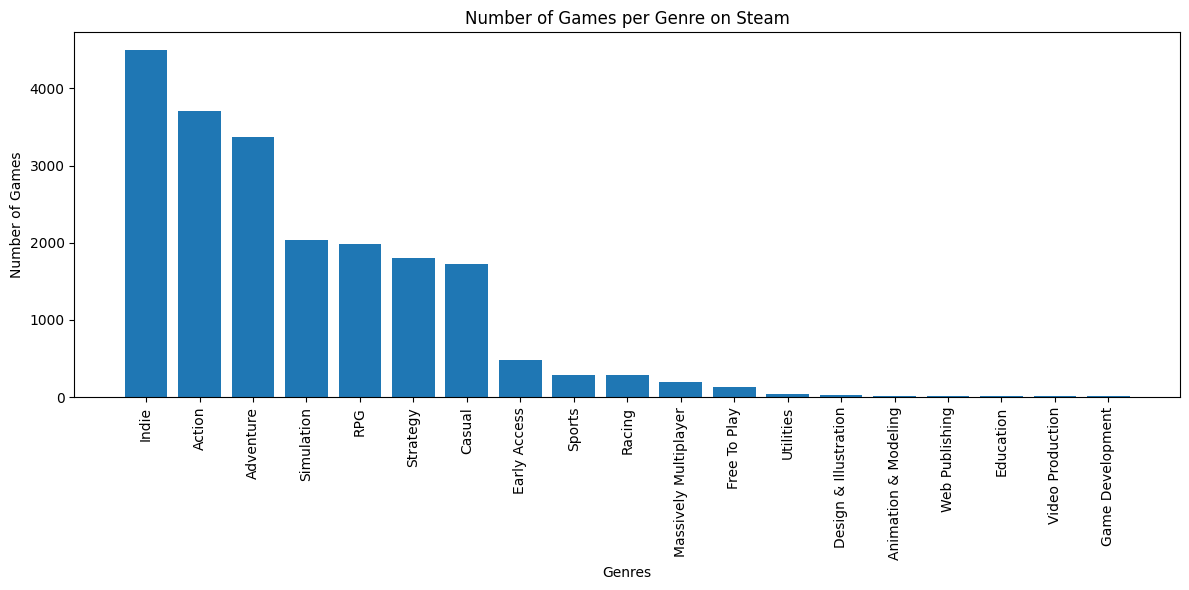

In [23]:
genre_names = [name for name, _ in sorted_genres_count]
genre_values = [count for _, count in sorted_genres_count]
plt.figure(figsize=(12, 6))
plt.bar(genre_names, genre_values)
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of Games")
plt.title("Number of Games per Genre on Steam")
plt.tight_layout()
plt.show()